# Testes de Correlação

O que é correlação ?

Na estatística é muito interessante saber como é o relacionamento ou a associação entre as variáveis que estão sendo estudadas. É comum encontrar variáveis com um relacionamento positivo (quando uma "sobe" a outra também "sobe"), relacionamento negativo (quando uma "desce" o outra "sobe") ou quando não há a existência de nenhum relacionamento. 

A correlação é uma medida de força de associação entre duas as variáveis, por isso o coeficiente de correlação varia entre -1 (correlação negativa perfeita) e +1 (correlação positiva perfeito). O valor 0 significa que não existe associação entre as variáveis.

Principais tipos de correlação

- Coeficiente de correlação de *Pearson*;

- Coeficiente de correlação de *Spearman*;

- Coeficiente de correlação de *Kendall*.

Analisar a correlação é importante, principalmente, em problemas de regressão para saber quais variáveis possuem um melhor poder para explicar o comportamento médio da variável dependente (ou de interesse)

Além da existência desses coeficientes, há teste de hipóteses para analisar se essas correlações são ou não estatisticamente diferentes de zero.


### Interpretação do coeficiente de correlação

|    Valor do coeficiente $\rho$      | Interpretação  |
|:--------:|:-----------:|
| -1   | Correlação negativamente perfeita  | 
| ]-1 a -0.90   | Correlação negativa muito forte      |  
| -0.89 a -0.70   | Correlação negativa forte      |  
| -0.69 a -0.40  | Correlação negativa moderada  | 
| -0.39 a -0.20  | Correlação negativa fraca      |
| -0.19 a 0.00[   | Correlação negativa muito fraca  |
| 0.00   | Correlação nula ou inexistente  |
|]0.00 a 0.19   | Correlação positiva muito fraca  | 
|0.20 a 0.39  | Correlação positiva fraca      |  
|0.40 a 0.69  | Correlação positiva moderada  | 
|0.70 a 0.89  | Correlação positiva forte      |
|0.90 a +1[  | Correlação positiva muito forte      |
| +1  | Correlação positivamente perfeita   |

In [ ]:
%load_ext rpy2.ipython

In [ ]:
pip install pingouin

     |████████████████████████████████| 205 kB 32.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204754 sha256=6e2de6c5e8f0f3cb447d51e90248f44ecc6d25e302a30aff521cdc54d4092069
  Stored in directory: /root/.cache/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=ba904deff397e991a049d60a9d92a787cc639ecba0a2547af2da98259c261c89
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [ ]:
import pandas as pd
from scipy import stats
import pingouin as pg

## Importando os dados

In [ ]:
%%R

casa = read.csv('Mumbai1.csv')

In [ ]:
casa = pd.read_csv('Mumbai1.csv')

Antes de realizar os teste é interessante analisar os graficamente os dados.

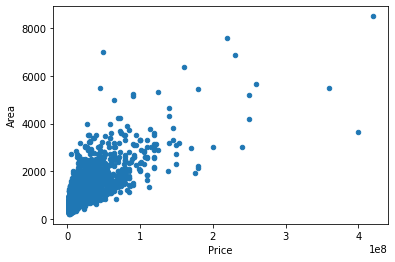

In [ ]:
casa.plot.scatter(x='Price',y='Area');

## Teste do coeficiente de correlação de *Pearson*

O coeficiente de *Pearson* é a medida estatística mais usada para obter a associação entre duas variáveis linearmente relacionadas. 

A sua fórmula é dada por:

$\rho = \dfrac{Cov(x,y)}{S_x S_y}= \dfrac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum(x_i - \overline{x})^2 \sum(y_i - \overline{y})^2}}$

Onde,

- $Cov(x,y)$ é a covariância entre as variáveis;
- $S_x$ e $S_y$ são, respectivamente, o desvio-padrão de $x$ e o desvio-padrão de $y$;
- $x_i$ é o valor de $x$ para cada $i$;
- $y_i$ é o valor de $y$ para cada $i$;
- $\overline{x}$ é a média de $x$;
- $\overline{y}$ é a média de $y$;

### **O teste**

O teste aplicado e assume que os valores de $x$ e $y$ originam-se de uma distribuição normal e que a relação é linear. A estatística do teste é dada pela fórmula abaixo

$t = \dfrac{\rho}{\sqrt{1 - \rho^2}} \cdot \sqrt{n-2}$

Onde,

- $n$ é o número de observações;
- e $\rho$ o valor da correlação.

segue uma distribuição *t-student* com *n-2* graus de liberdade.

A **hipótese nula**($H_0$) do teste é que a correlação entre as variáveis é estatisticamente igual a zero. Para rejeitar a hipótese nula a estatística do teste deve ser maior que o valor encontrado na tabela *t-student* dado o nível de significância.


**Calculando o teste de correlação de *Pearson* no *R*.**

In [ ]:
%%R

cor.test(casa$Price,casa$Area,method="pearson",alternative="two.sided",conf.level = 0.95)


	Pearson's product-moment correlation

data:  casa$Price and casa$Area
t = 83.202, df = 6345, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7103573 0.7338960
sample estimates:
      cor 
0.7223358 



**Calculando o teste de correlação de *Pearson* em *Python*.**

In [ ]:
#com a biblioteca Scipy
stats.pearsonr(casa['Price'], casa['Area'])

(0.7223358040503131, 0.0)

In [ ]:
#Com a biblioteca Pigouin
casa.iloc[:,1:3].pairwise_corr()

,X,Y,method,tail,n,r,CI95%,p-unc,BF10,power
0,Price,Area,pearson,two-sided,6347,0.722336,"[0.71, 0.73]",0.0,inf,1.0


### Resultado do teste

O valor da correlação entre o Preço das casas e a área foi de 0.722 (arredondado) e o *p-valor* calculado ficou abaixo de 0.05 (nível de significância padrão). Dessa forma, rejeitamos a hipótese nula (correlação estatisticamente igual a zero). 

## Teste do coeficiente de correlação de *Spearman*

A correlação de *Spearman* é semelhante a correlação de *Pearson*, mas com a diferença de que a correlação de *Spearman* avalia a relação monótona (linear e não linear) entre duas variáveis.

A fórmula da correlação de *Spearman* é dada abaixo:

$\rho = 1 - \dfrac{6\sum_{i=1}^{n} d_i^2}{n(n^2-1)}$

Onde,

- $n$ é o número de observações;
- $d_i$ é a diferença entre o posto de $x_i$ e $y_i$ (ou $R$($x_i$) - $R$($y_i$)).

**O teste**

Testa se a correlação de *Spearman* entre as variáveis é estatisticamente igual a zero. É assumido que as distribuições dos dados são contínuas e que os dados foram obtidos aos pares.

A estatística do teste é dada por

$Z = \dfrac{6R - n(n^2-1)}{n(n+1)\sqrt{n-1}}$

Onde $R = \sum_{i=1}^{n} d_i^2$.

Se a estatística de teste for menor que os valores críticos obtidos para o teste, então aceita-se a hipótese nula. Caso contrário, rejeita-se a hipótese nula.

**Calculando o teste de correlação de *Spearman* no *R*.**


In [ ]:
%%R

cor.test(casa$Price,casa$Area,method="spearman",alternative="two.sided",conf.level = 0.95)


	Spearman's rank correlation rho

data:  casa$Price and casa$Area
S = 1.2676e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7025346 



**Calculando o teste de correlação de *Spearman* em *Python*.**

In [ ]:
#com a biblioteca Scipy
stats.spearmanr(casa['Price'], casa['Area'])

SpearmanrResult(correlation=0.7025346151453671, pvalue=0.0)

In [ ]:
#Com a biblioteca Pigouin
casa.iloc[:,1:3].pairwise_corr(method='spearman')

,X,Y,method,tail,n,r,CI95%,p-unc,power
0,Price,Area,spearman,two-sided,6347,0.702535,"[0.69, 0.71]",0.0,1.0


### Resultado do teste

O valor da correlação entre o Preço das casas e a área foi de 0.7025 (arredondado) e o *p-valor* calculado ficou abaixo de 0.05 (nível de significância padrão). Dessa forma, rejeitamos a hipótese nula (correlação estatisticamente igual a zero). 

## Teste do coeficiente de correlação de *Kendall*

A correlação de *Kendall* mede a associação ordinal entre duas variáveis, porém irei usar os dados anteriormente usados (Preço e área das casas).

A coeficiente de *Kendall* é dado abaixo:

$\tau = \dfrac{2(n_c - n_d)}{n(n-1)}$

Onde,

- $n$ é o número de observações;
- $n_c$ é o número de observações concordantes (observações cujos valores de $x_i < x_j$ e $y_i < y_j$ 

(ou caso de serem juntamente $x_i > x_j$ e $y_i > y_j$);
- $n_d$ é o número de observações discordantes (se não seguir a regra anterior).

**O teste**

O teste, assim como os de *Pearson* e *Spearman*, testa se a correlação é estatisticamente igual a zero. Assim como no teste de *Spearman* os dados devem ter uam distribuição contíbua e os dados devem ser obtidos em pares.

A estatística do teste segue uma distribuição normal e é dada abaixo

$Z = \dfrac{n_c - n_d}{\sqrt{\frac{n(n-1)(2n+5)}{18}}}$

Se o valor da estatística estiver dentro da região definida pelos valores críticos, aceita-se a hipótese nula de que a correlação é estatisticamente igual a zero; caso contrário, rejeita-se a hipótese nula.

**Calculando o teste de correlação de *Kendall* em *R*.**

In [ ]:
%%R

cor.test(casa$Price,casa$Area,method="kendall",alternative="two.sided",conf.level = 0.95)


	Kendall's rank correlation tau

data:  casa$Price and casa$Area
z = 60.752, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5116383 



**Calculando o teste de correlação de *Kendall* em *Python*.**

---



In [ ]:
#com a biblioteca Scipy
stats.kendalltau(casa['Price'], casa['Area'])

KendalltauResult(correlation=0.5116383130327385, pvalue=0.0)

In [ ]:
#Com a biblioteca Pingouin
casa.iloc[:,1:3].pairwise_corr(method='kendall')

,X,Y,method,tail,n,r,CI95%,p-unc,power
0,Price,Area,kendall,two-sided,6347,0.511638,"[0.49, 0.53]",0.0,1.0


### Resultado do teste

O valor da correlação entre o Preço das casas e a área foi de 0.5116 (arredondado) e o *p-valor* calculado ficou abaixo de 0.05 (nível de significância padrão). Dessa forma, rejeitamos a hipótese nula (correlação estatisticamente igual a zero). 